In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [28]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


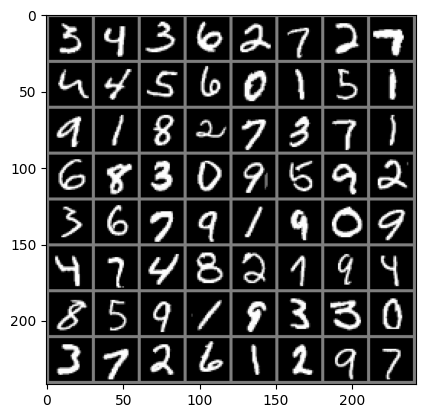

Labels: tensor([3, 4, 3, 6, 2, 7, 2, 7, 4, 4, 5, 6, 0, 1, 5, 1, 9, 1, 8, 2, 7, 3, 7, 1,
        6, 8, 3, 0, 9, 5, 9, 2, 3, 6, 7, 9, 1, 9, 0, 9, 4, 7, 4, 8, 2, 1, 9, 4,
        8, 5, 9, 1, 9, 3, 3, 0, 3, 7, 2, 6, 1, 2, 9, 7])


In [29]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

#1. Compare 3 different configurations while the model is wider/deeper

###1'st Configuration

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model = SimpleNN()


In [5]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [6]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.5023
Epoch [2/10], Loss: 1.5160
Epoch [3/10], Loss: 1.4750
Epoch [4/10], Loss: 1.5439
Epoch [5/10], Loss: 1.5317
Epoch [6/10], Loss: 1.5081
Epoch [7/10], Loss: 1.4697
Epoch [8/10], Loss: 1.4658
Epoch [9/10], Loss: 1.4890
Epoch [10/10], Loss: 1.4940
Training Finished


In [7]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9666
F1 Score: 0.9666
Precision: 0.9668
Recall: 0.9666
Confusion Matrix:
 [[ 949    0    3    2    1    5   12    2    4    2]
 [   0 1123    3    1    0    0    3    1    4    0]
 [   5    1  996    1    7    1    3    9    9    0]
 [   0    2    7  952    3   14    1    7   19    5]
 [   1    0    2    0  962    0    7    1    1    8]
 [   4    0    0    9    4  857    8    1    5    4]
 [   4    1    1    1    4    4  939    0    4    0]
 [   0    8   14    2    5    1    0  978    1   19]
 [   0    1    3    3    8    1    9    3  942    4]
 [   3    3    0    3   14    4    2    1   11  968]]


###2'nd Configuration

In [38]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) #mengubah jumlah unit di layer pertama
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model2 = SimpleNN()

In [39]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

In [40]:
num_epochs = 10

for epoch in range(num_epochs):
    model2.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.6292
Epoch [2/10], Loss: 1.6392
Epoch [3/10], Loss: 1.5410
Epoch [4/10], Loss: 1.5252
Epoch [5/10], Loss: 1.4634
Epoch [6/10], Loss: 1.4921
Epoch [7/10], Loss: 1.4670
Epoch [8/10], Loss: 1.4665
Epoch [9/10], Loss: 1.5333
Epoch [10/10], Loss: 1.5029
Training Finished


In [41]:
model2.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9708
F1 Score: 0.9708
Precision: 0.9710
Recall: 0.9708
Confusion Matrix:
 [[ 967    0    1    0    0    1    8    1    2    0]
 [   0 1124    4    0    0    1    1    1    4    0]
 [   4    1 1005    2    1    0    5    5    9    0]
 [   0    2   13  965    1    8    0   11    7    3]
 [   3    0    3    0  947    1    8    4    2   14]
 [   6    0    0    8    1  848   12    4    9    4]
 [   6    2    1    1    1    2  938    0    7    0]
 [   1    7   15    0    0    0    1  996    3    5]
 [   4    0    3    3    3    2    5    6  944    4]
 [   4    3    1    3    6    1    2   12    3  974]]


###3'rd configuration



In [42]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64) #mengubah jumlah unit di layer pertama
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

model3 = SimpleNN()

In [43]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

In [44]:
num_epochs = 10

for epoch in range(num_epochs):
    model3.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model3(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')


Epoch [1/10], Loss: 1.6642
Epoch [2/10], Loss: 1.5607
Epoch [3/10], Loss: 1.5112
Epoch [4/10], Loss: 1.5755
Epoch [5/10], Loss: 1.6091
Epoch [6/10], Loss: 1.5889
Epoch [7/10], Loss: 1.4743
Epoch [8/10], Loss: 1.4928
Epoch [9/10], Loss: 1.5531
Epoch [10/10], Loss: 1.5348
Training Finished


In [45]:
model3.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model3(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
confusion = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 0.9495
F1 Score: 0.9494
Precision: 0.9500
Recall: 0.9495
Confusion Matrix:
 [[ 966    0    0    4    1    2    3    1    3    0]
 [   0 1114    4    5    0    2    2    2    5    1]
 [   6    2  985    7    8    0    7    8    7    2]
 [   1    0    5  979    0    6    4    8    5    2]
 [   2    0    4    2  921    0    9    4    1   39]
 [   8    1    1   43    4  799   11    4   13    8]
 [   9    3    5    3    2    4  928    2    2    0]
 [   1    6   22    4    7    1    0  966    1   20]
 [   6    6    5   27    5    6    8   11  896    4]
 [   5    6    0   13   15    4    1   12   12  941]]


##Penjelasan Hasil
#####Dari 3 konfigurasi berbeda yang dilakukan dengan memodifikasi arsitektur model, yaitu perubahan jumlah unit pada layer, didapatkan hasil berikut :
1. Model pertama dengan jumlah unit 128, mendapatkan nilai akurasi 96.66%
2. Model kedua dengan jumlah unit 256, mendapatkan nilai akurasi 97.08%
3. Model ketiga dengan jumlah unit 64, mendapatkan nilai akurasi 94.95%

Kesimpulan yang saya dapatkan dari 3 model berbeda ini adalah semakin besar jumlah unit dalam layer, maka semakin bertambah nilai akurasinya, namun bertambah pula kompleksitasnya yang menyebabkan waktu runtime juga bertambah.